In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
import operator
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def euclideanDistance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))


def getNeighbours(X_train, testInstance, k):
    distances=[]
    neighbours = []
    for i in range(len(X_train)):
        dist = (euclideanDistance(testInstance, X_train[i]),i)
        distances.append(dist)
    distances.sort(key=operator.itemgetter(0))
    for i in range(k+1):
        neighbours.append(distances[i])
    return neighbours



def getResponse(neighbors, y_train):
    results = {}
    for i in range(len(neighbors)-1):
        response = y_train[neighbors[i][1]]
        if response in results:
            results[response] += (1-np.abs(neighbors[i][0]/neighbors[-1][0]))
        else:
            results[response] =  (1-np.abs(neighbors[i][0]/neighbors[-1][0]))
    sorted_votes = sorted(results.items(), reverse=True)
    return sorted_votes[0][0]


In [108]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.67)


def testing(X_test, k=1):
    result=[]
    for i in range(len(X_test)):
        neighbours = getNeighbours(X_train, X_test[i], k)
        result.append(getResponse(neighbours, y_train))
    return result
print(classification_report(y_test, np.array(testing(X_test,1))))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        67
           1       0.92      0.98      0.95       121

    accuracy                           0.93       188
   macro avg       0.94      0.91      0.92       188
weighted avg       0.93      0.93      0.93       188



In [109]:
parameterGrid=ParameterGrid({'k': list(range(1,10))})
roc_aucs=[]

for param in parameterGrid:
    roc_aucs.append(roc_auc_score(y_test, testing(X_test,param['k'])))

{'k': 1}


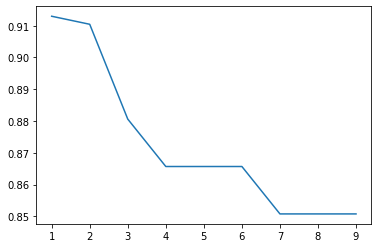

In [110]:
print(parameterGrid[np.argmax(roc_aucs)])
plt.plot(range(1,10), roc_aucs)

